In [1]:
%%time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import normalize

plt.rcParams['figure.figsize'] = 5.0, 4.0

from pyts.transformation import GADF,GASF
from sklearn.preprocessing import normalize

import uproot
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

from heatmapcluster import heatmapcluster

CPU times: user 1.12 s, sys: 372 ms, total: 1.49 s
Wall time: 2.32 s


In [2]:
%%time
class Waveform1():
    
    def __init__(self, path=None, selector=None):
        if path is None:
            raise ValueError("Insert file path!")
            
        tree = uproot.open(path)["tree"]
        extra = np.arange(4096,4480)
        pmtall = tree.array("PMTALL")
        pmtall = np.delete(pmtall, extra, axis=1)
        pedestal = tree.array("Pedestal")
        pedestal_sum = pedestal[:,0]
        for i in range(len(pedestal_sum)):
            pmtall[i] = pedestal_sum[i] - pmtall[i]
        
        energy1 = tree.array("Energy")
        energy1 = energy1[:,1]
        
        label = np.load("label.npy")
        label2 = np.load("label_4.npy")
        survives = np.load("survives.npy")
        final = np.load("final.npy")
        final_final = np.load("final_final.npy")
        really_final = np.load("really_final.npy")
        
        selector1 = np.load("selector_pure.npy")
        
        del tree,pedestal,pedestal_sum
    
        waveform_f = pmtall[label==4]
        waveform_f = waveform_f[label2==1]
        waveform_f = waveform_f[survives==0]
        waveform_f = waveform_f[final==1]
        waveform_f = waveform_f[final_final==1]
        waveform_f = waveform_f[really_final==1]
        self.waveform = waveform_f[selector1==selector]
        
        energy1 = energy1[label==4]
        energy1 = energy1[label2==1]
        energy1 = energy1[survives==0]
        energy1 = energy1[final==1]
        energy1 = energy1[final_final==1]
        energy1 = energy1[really_final==1]
        self.energy = energy1[selector1==selector]
        
        del pmtall,waveform_f
    
    def __len__(self):
        return self.waveform.shape[0]
    
    def __getitem__(self,idx):
        return self.waveform[idx],self.energy[idx]



CPU times: user 56 µs, sys: 1 µs, total: 57 µs
Wall time: 62 µs


In [2]:
%%time
class Waveform2():
    
    def __init__(self, path=None,selector=None):
        if path is None:
            raise ValueError("Insert file path!")

        tree = uproot.open(path)["tree"]
        extra = np.arange(4096,4480)
        pmtall = tree.array("PMTALL")
        pmtall = np.delete(pmtall, extra, axis=1)
        pedestal = tree.array("Pedestal")
        pedestal_sum = pedestal[:,0]
        
        energy2 = tree.array("Energy")
        energy2 = energy2[:,1]
        
        for i in range(len(pedestal_sum)):
            pmtall[i] = pedestal_sum[i] - pmtall[i]
        selector2 = np.load("selector_psd.npy")
    
#         waveform_n = normalize(pmtall,axis=1,norm="l2")
        self.waveform = pmtall[selector2==selector]
        self.energy = energy2[selector2==selector]
        
#         self.waveform = normalize(waveform_s,axis=1,norm="l2")
        del tree,pmtall
    def __len__(self):
        return self.waveform.shape[0]
    
    def __getitem__(self,idx):
        return self.waveform[idx],self.energy[idx]



CPU times: user 43 µs, sys: 1 µs, total: 44 µs
Wall time: 47.9 µs


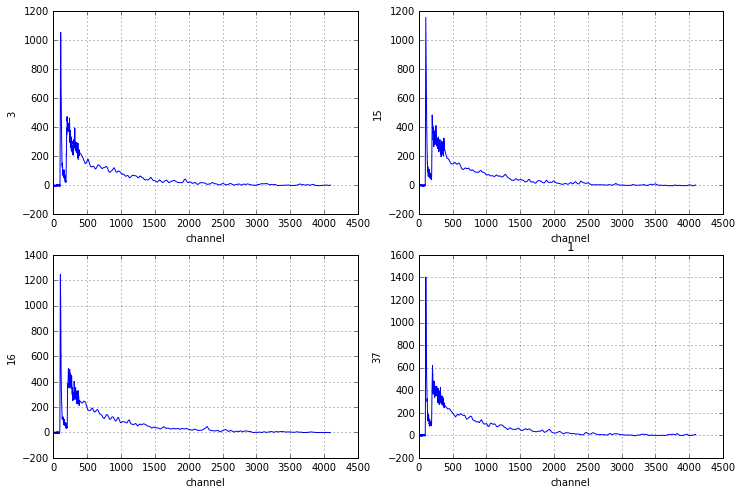

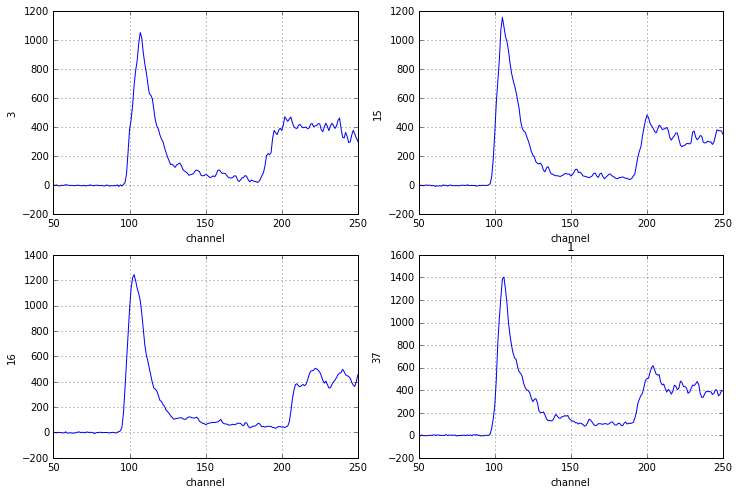

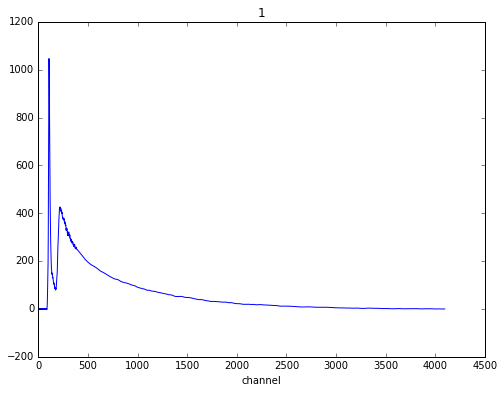

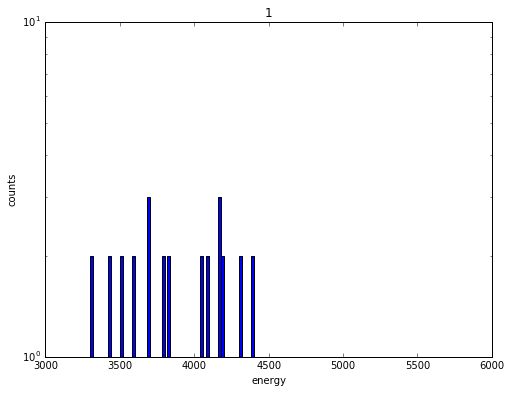

groups=1 counts= 53


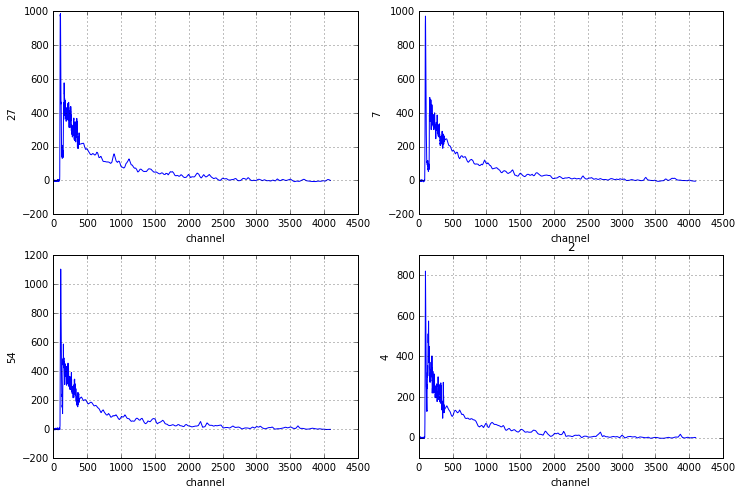

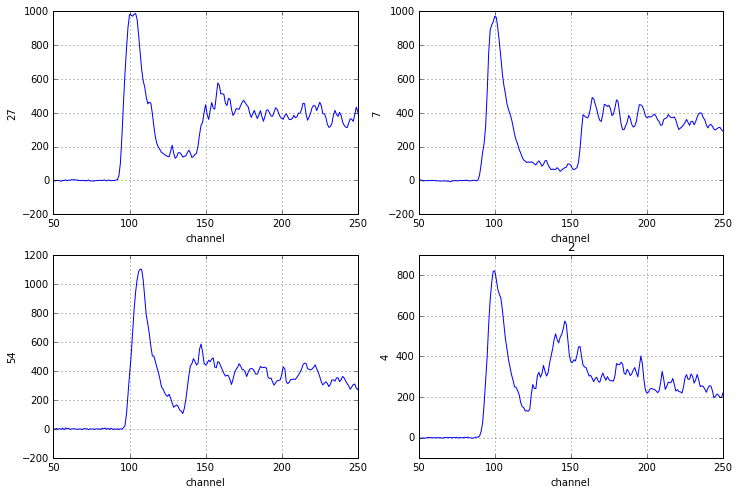

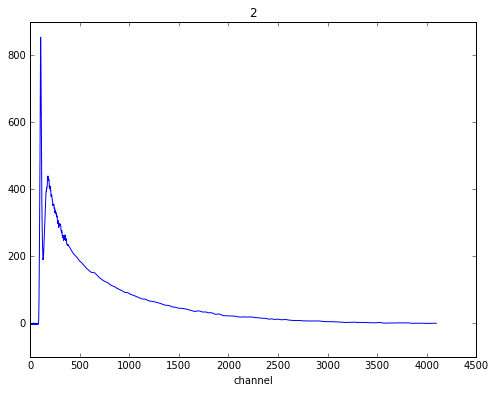

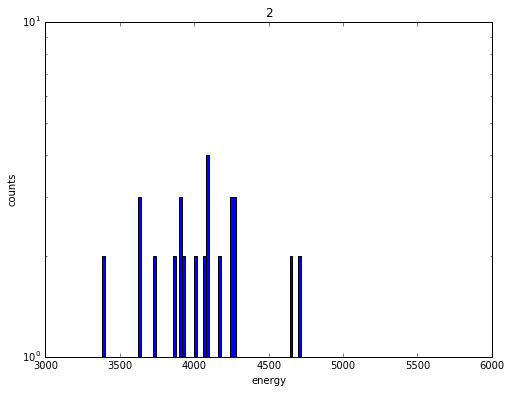

groups=2 counts= 66


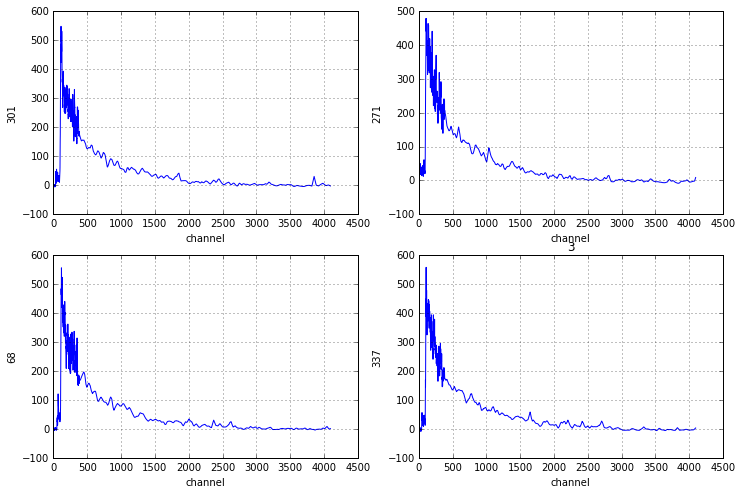

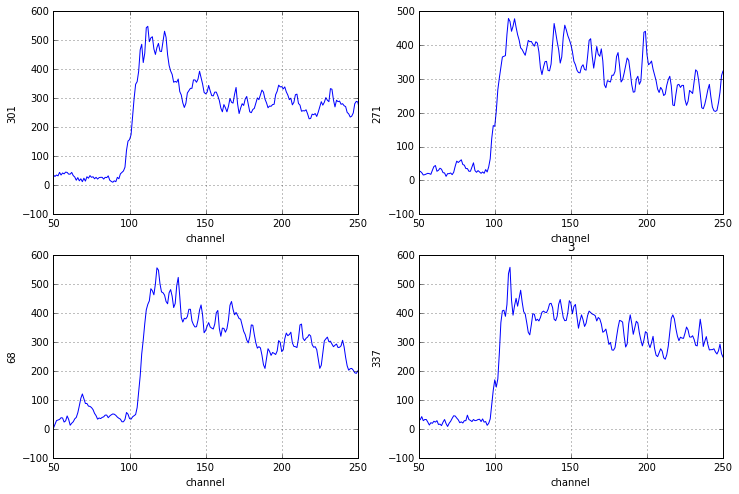

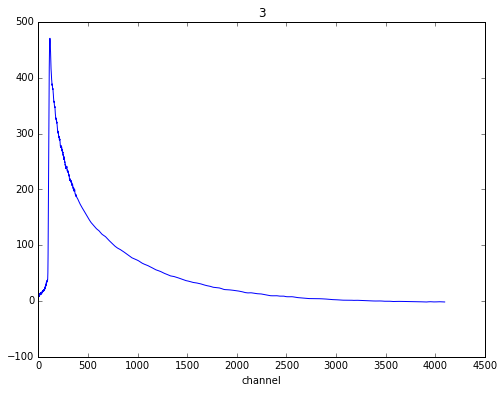

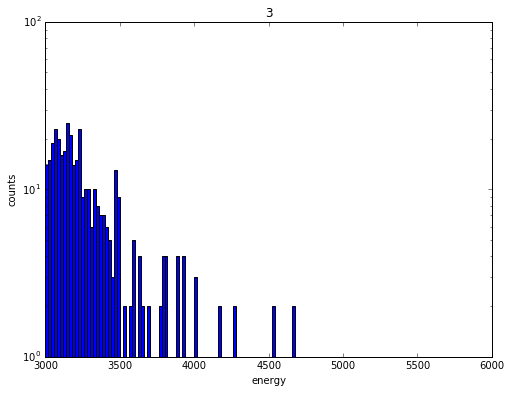

groups=3 counts= 390


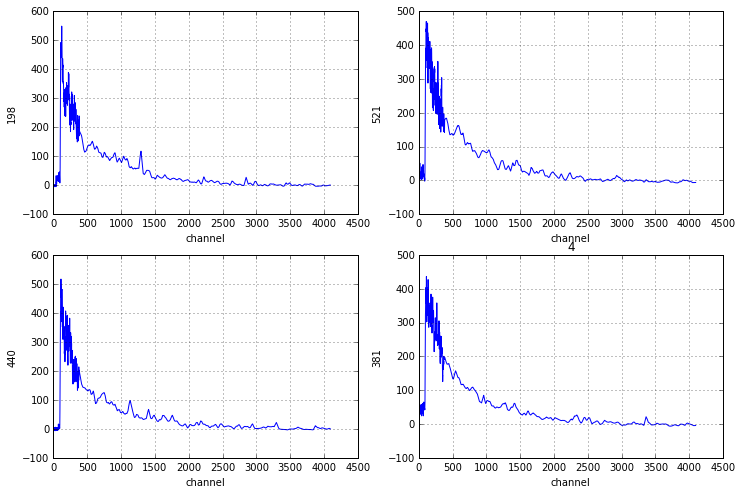

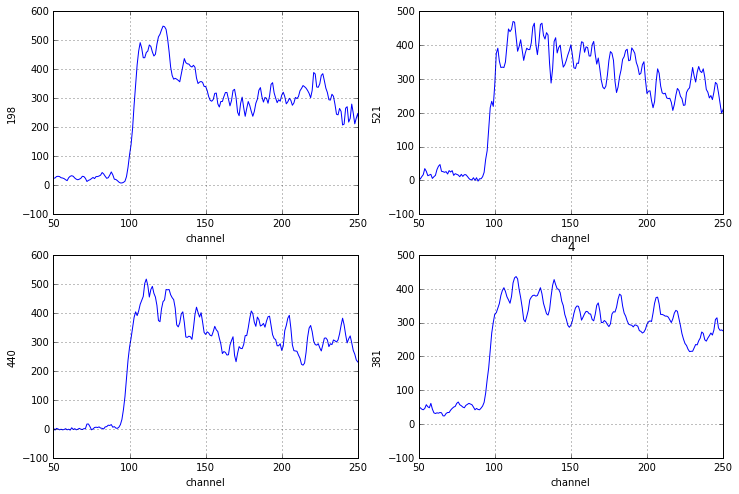

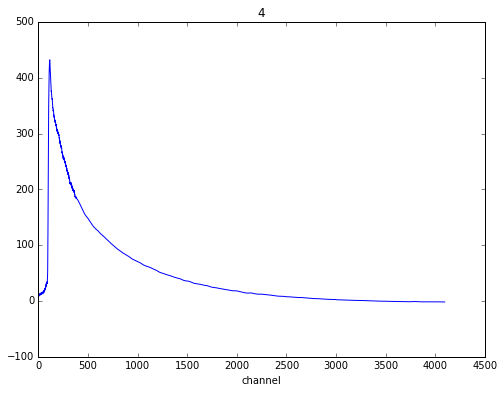

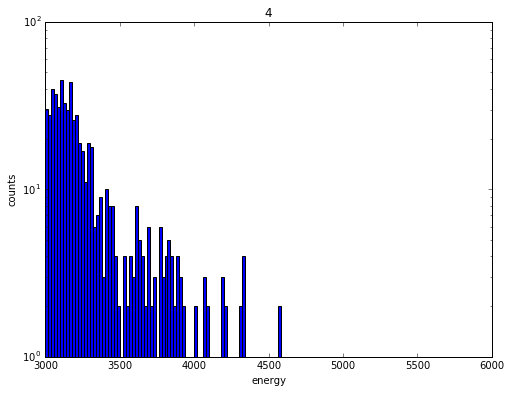

groups=4 counts= 626


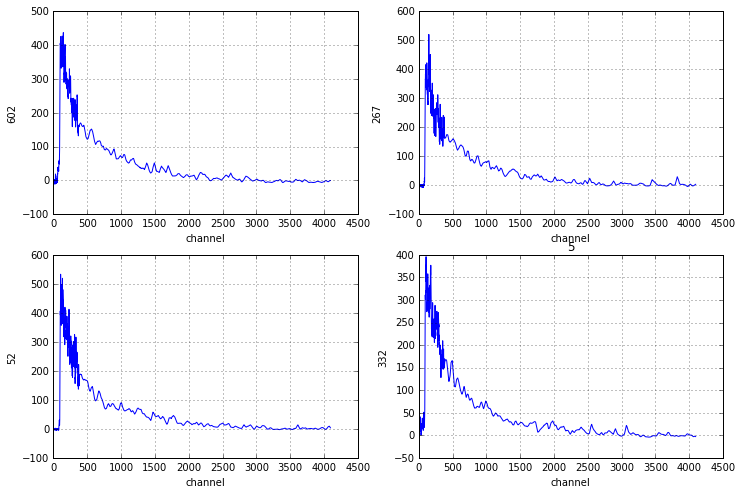

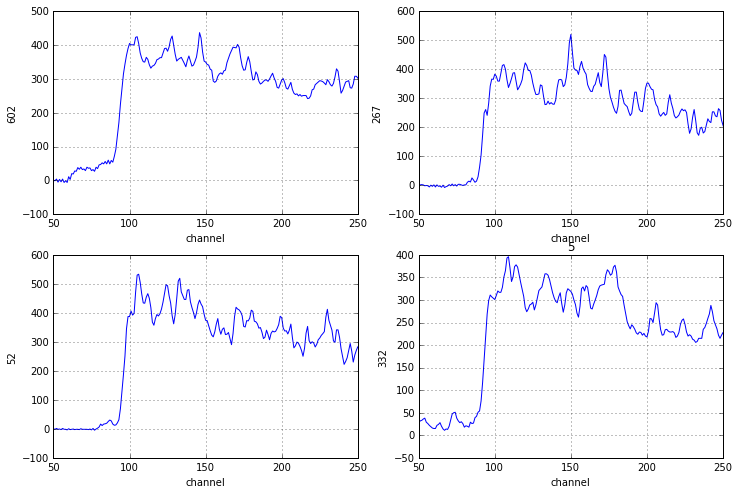

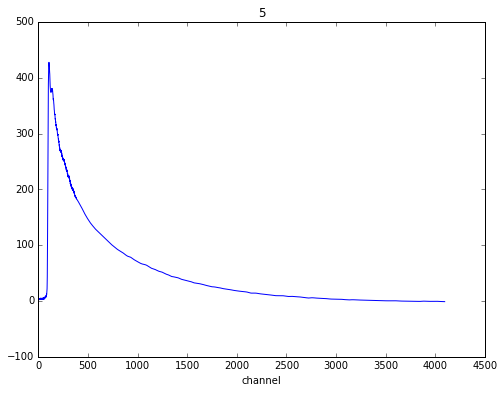

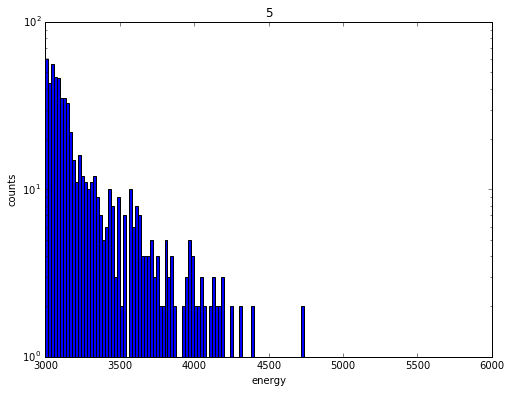

groups=5 counts= 669


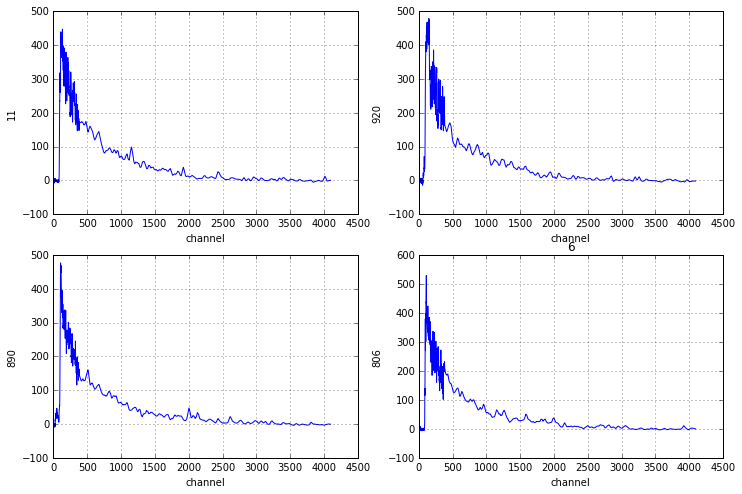

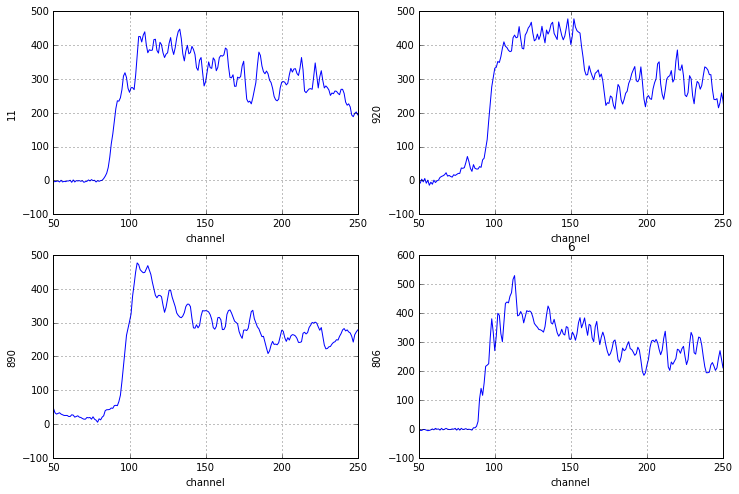

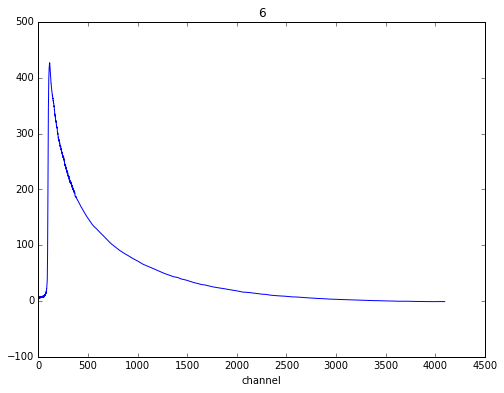

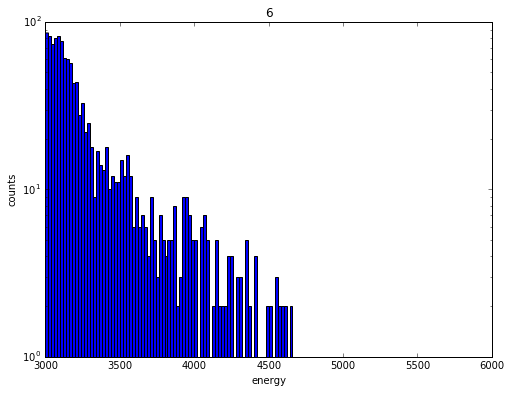

groups=6 counts= 1256


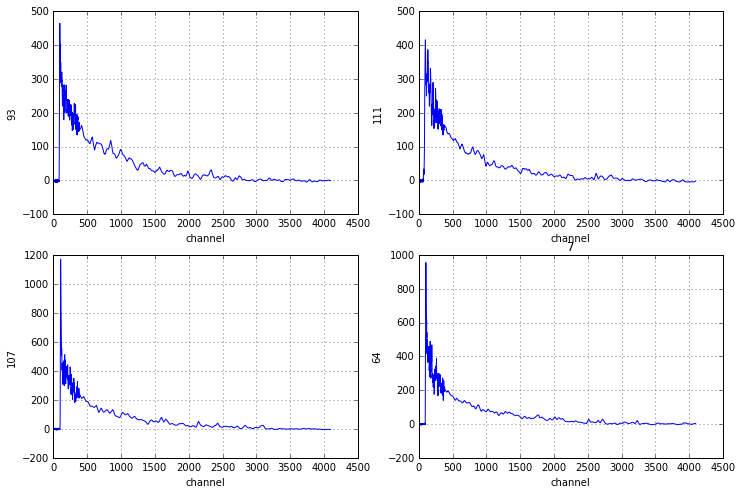

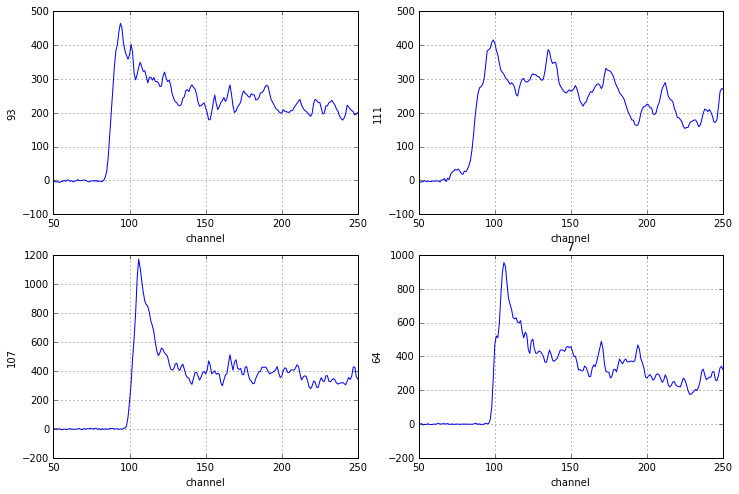

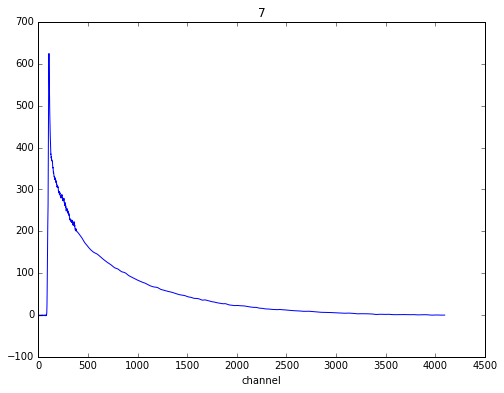

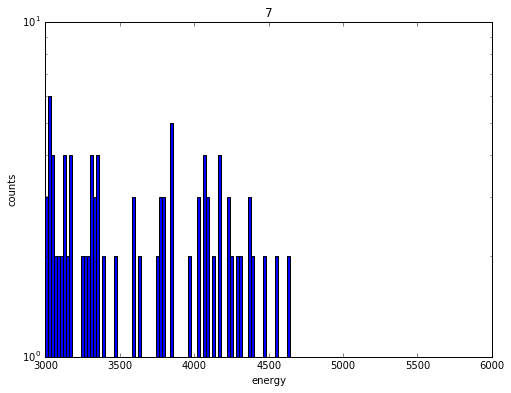

groups=7 counts= 141


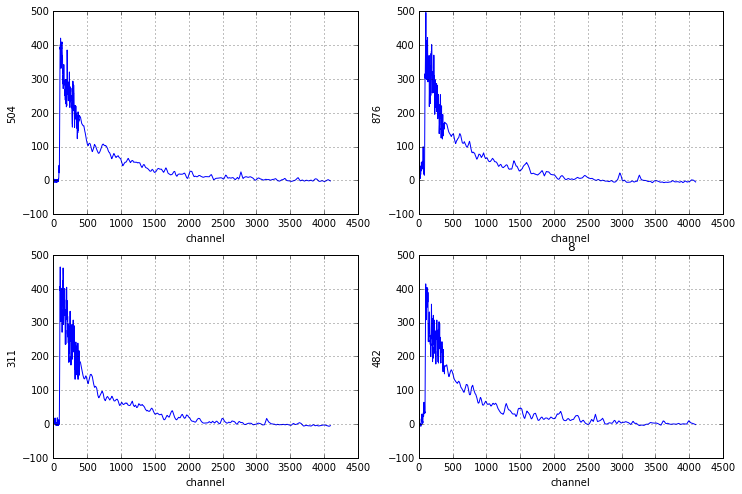

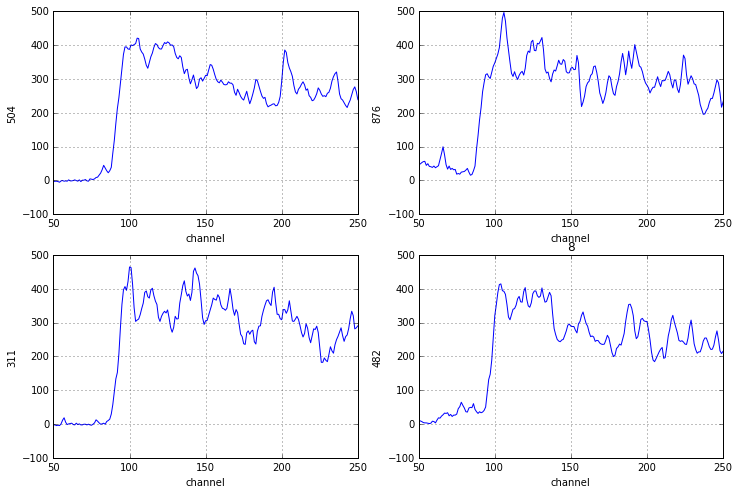

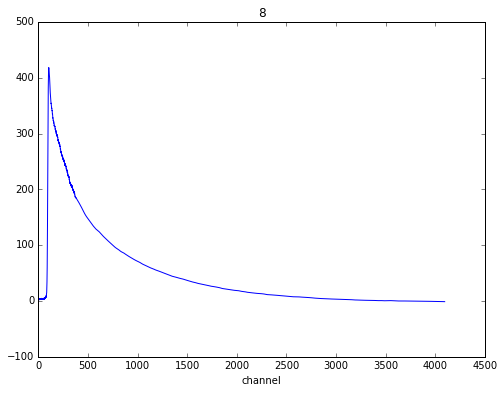

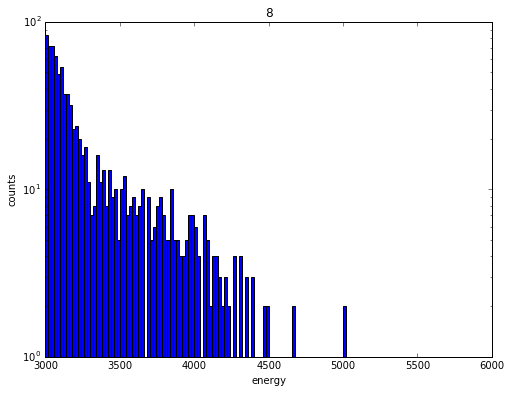

groups=8 counts= 967


In [4]:
sel1 = np.load("selector_pure.npy")

for i in np.unique(sel1):
    file = Waveform1(path="../Run9goodDataQ_dualgate.root", selector=i)
    r1 = np.random.randint(len(file[:][1])) 
    r2 = np.random.randint(len(file[:][1]))
    r3 = np.random.randint(len(file[:][1]))
    r4 = np.random.randint(len(file[:][1]))
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(file[r1][0])
    plt.grid(True)
    plt.ylabel("{}".format(r1))
    plt.xlabel("channel")
    plt.subplot(222)
    plt.plot(file[r2][0])
    plt.grid(True)
    plt.ylabel("{}".format(r2))
    plt.xlabel("channel")
    plt.subplot(223)
    plt.plot(file[r3][0])
    plt.grid(True)
    plt.ylabel("{}".format(r3))
    plt.xlabel("channel")
    plt.subplot(224)
    plt.plot(file[r4][0])
    plt.grid(True)
    plt.ylabel("{}".format(r4))
    plt.xlabel("channel")
#     plt.savefig("fig/wave_encode{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(file[r1][0])
    plt.xlim(50,250)
    plt.grid(True)
    plt.ylabel("{}".format(r1))
    plt.xlabel("channel")
    plt.subplot(222)
    plt.plot(file[r2][0])
    plt.xlim(50,250)
    plt.grid(True)
    plt.ylabel("{}".format(r2))
    plt.xlabel("channel")
    plt.subplot(223)
    plt.plot(file[r3][0])
    plt.xlim(50,250)
    plt.grid(True)
    plt.ylabel("{}".format(r3))
    plt.xlabel("channel")
    plt.subplot(224)
    plt.plot(file[r4][0])
    plt.xlim(50,250)
    plt.grid(True)
    plt.ylabel("{}".format(r4))
    plt.xlabel("channel")
#     plt.savefig("fig/zoom_encode{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.plot(np.mean(file[:][0],axis=0))
    plt.xlabel("channel")
#     plt.savefig("fig/avwave_encode{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.hist(file[:][1], bins=np.arange(3000,6000,20))
    plt.yscale("log")
    plt.xlabel("energy")
    plt.ylabel("counts")
#     plt.savefig("fig/hist_encode{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    print("groups={}".format(i), "counts=",len(file[:][1]))

# Alpha Beta separation, scurtinized

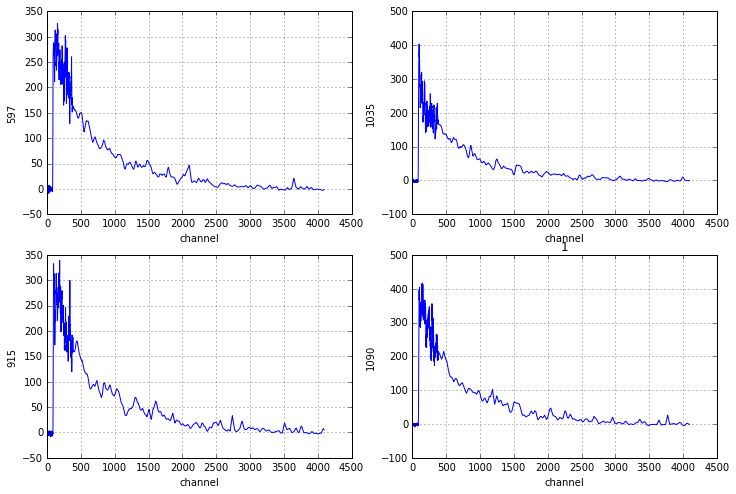

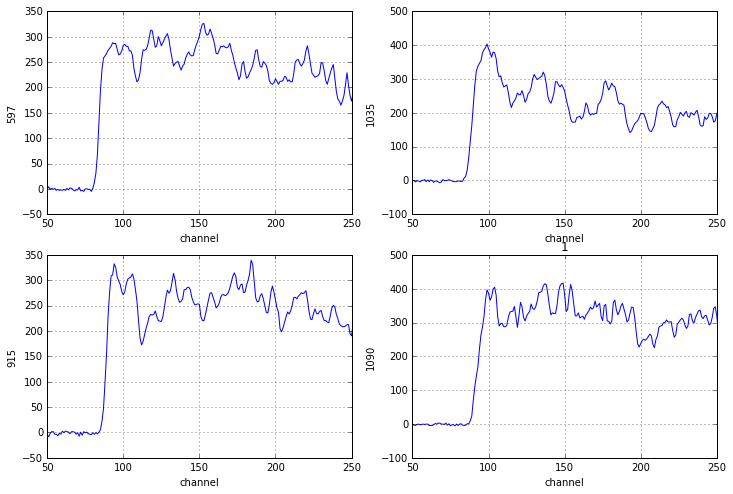

waveform1 [-1.813477e+00  3.186523e+00 -3.813477e+00 -2.813477e+00 -4.813477e+00
  1.865234e-01  1.865234e-01 -8.134766e-01 -8.134766e-01 -4.813477e+00
  1.186523e+00  1.318652e+01  3.118652e+01  6.818652e+01  1.291865e+02
  1.941865e+02  2.351865e+02  2.581865e+02  2.621865e+02  2.671865e+02
  2.731865e+02  2.771865e+02  2.811865e+02  2.881865e+02  2.861865e+02
  2.871865e+02  2.751865e+02  2.641865e+02  2.661865e+02  2.721865e+02
  2.831865e+02  2.851865e+02  2.811865e+02  2.811865e+02  2.721865e+02
  2.721865e+02  2.631865e+02  2.371865e+02  2.221865e+02  2.111865e+02
  2.151865e+02  2.291865e+02  2.551865e+02  2.741865e+02  2.731865e+02
  2.751865e+02  2.821865e+02  2.981865e+02  3.131865e+02  3.121865e+02]
waveform1 [  2.561523  -0.438477  -0.438477   0.561523   2.561523   0.561523
  -1.438477  -3.438477  -3.438477  -3.438477  -1.438477  -1.438477
  -3.438477  -1.438477   7.561523  12.561523  31.561523  68.56152
 114.56152  162.56152  220.56152  282.56152  323.56152  337.56152
 34

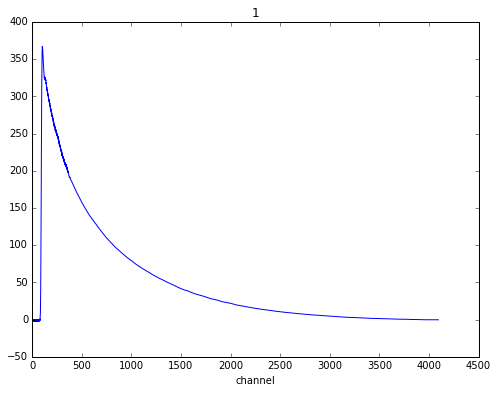

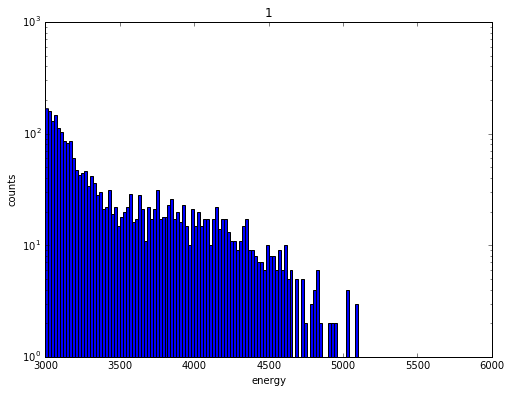

groups=1 counts= 2552


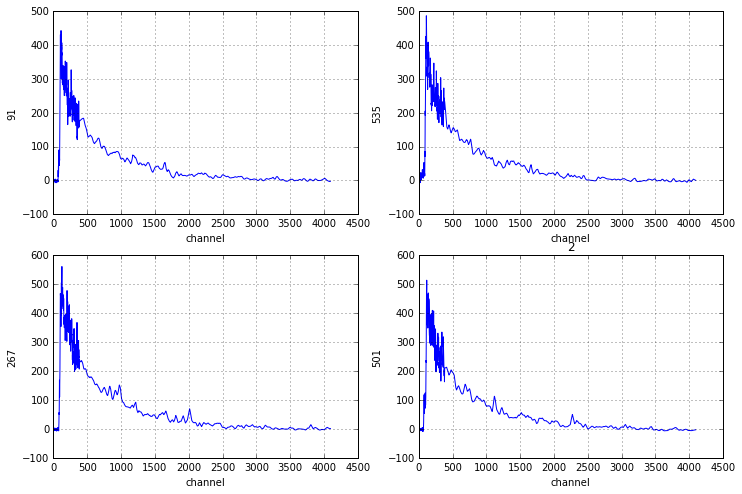

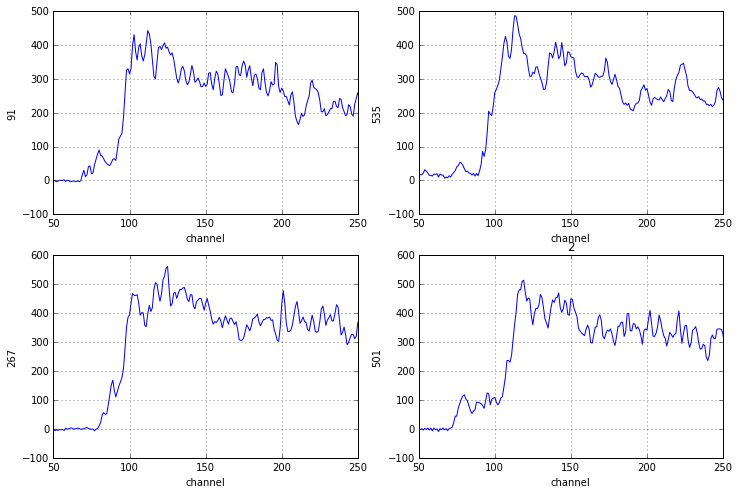

waveform1 [ 30.24121   11.241211  16.24121   41.24121   43.24121   20.24121
  22.24121   47.24121   62.24121   78.24121   90.24121   74.24121
  72.24121   64.24121   55.24121   50.24121   46.24121   44.24121
  52.24121   62.24121   64.24121   59.24121   91.24121  123.24121
 131.24121  139.24121  185.24121  256.2412   326.2412   330.2412
 315.2412   331.2412   400.2412   431.2412   380.2412   356.2412
 394.2412   404.2412   369.2412   353.2412   371.2412   408.2412
 443.2412   433.2412   405.2412   357.2412   308.2412   300.2412
 349.2412   392.2412  ]
waveform1 [ 14.097656  10.097656  18.097656  23.097656  29.097656  40.097656
  44.097656  53.097656  52.097656  45.097656  35.097656  26.097656
  28.097656  22.097656  21.097656  16.097656  21.097656  13.097656
  21.097656  14.097656  28.097656  47.097656  86.09766   71.09766
  91.09766  140.09766  205.09766  196.09766  192.09766  220.09766
 260.09766  269.09766  281.09766  296.09766  330.09766  365.09766
 405.09766  426.09766  409.09766 

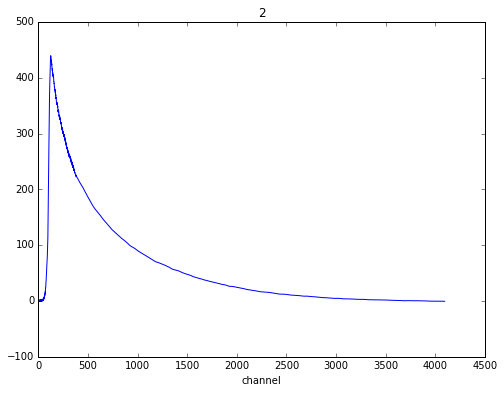

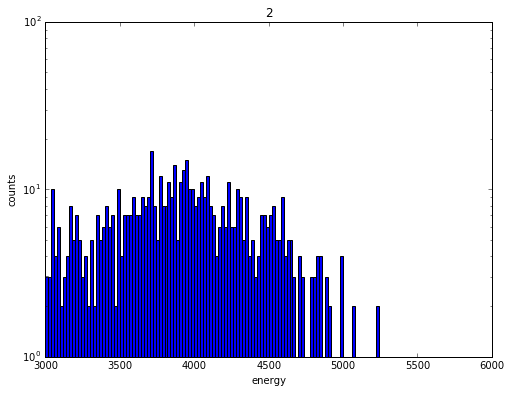

groups=2 counts= 640


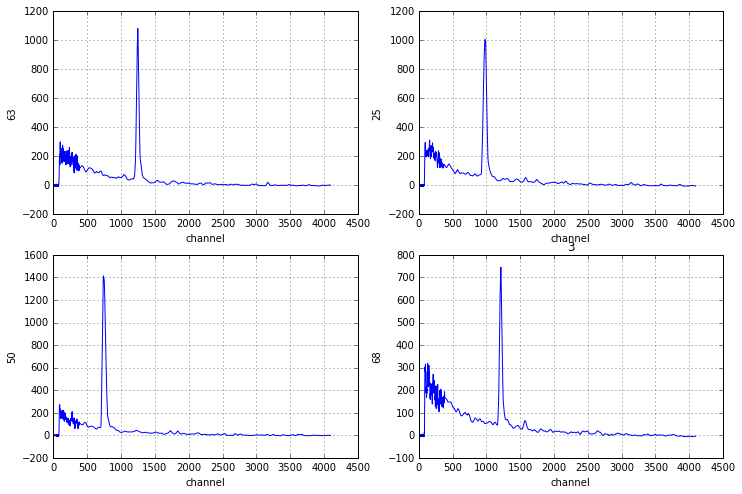

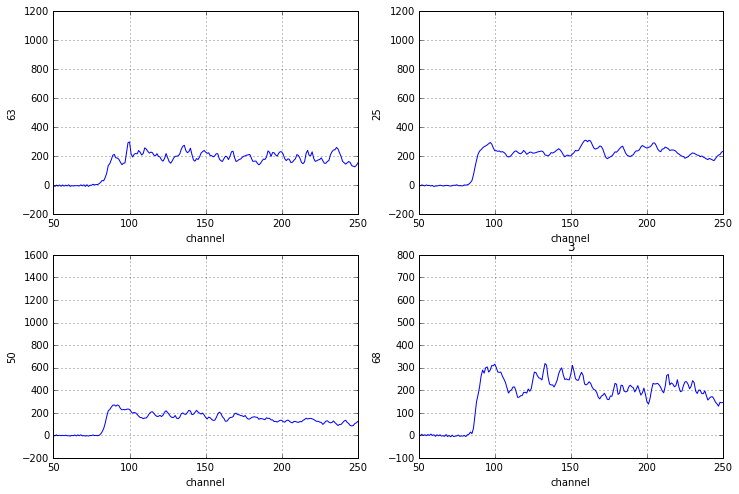

waveform1 [  3.382812  -7.617188   4.382812  -7.617188   0.382812   0.382812
   7.382812   2.382812   5.382812   5.382812  11.382812  20.382812
  33.382812  31.382812  53.382812  84.38281  136.38281  149.38281
 176.38281  207.38281  213.38281  189.38281  188.38281  179.38281
 159.38281  142.38281  152.38281  154.38281  224.38281  294.3828
 299.3828   216.38281  195.38281  214.38281  219.38281  217.38281
 240.38281  227.38281  209.38281  220.38281  258.3828   250.38281
 234.38281  222.38281  229.38281  225.38281  208.38281  203.38281
 218.38281  200.38281 ]
waveform1 [-3.269531e+00 -5.269531e+00 -2.269531e+00  7.304688e-01 -2.695312e-01
  3.730469e+00 -2.269531e+00 -2.269531e+00 -3.269531e+00 -3.269531e+00
  2.730469e+00  7.304688e-01  3.730469e+00  8.730469e+00  1.873047e+01
  3.273047e+01  7.273047e+01  1.247305e+02  1.727305e+02  2.147305e+02
  2.357305e+02  2.457305e+02  2.577305e+02  2.667305e+02  2.717305e+02
  2.787305e+02  2.877305e+02  2.957305e+02  2.847305e+02  2.587305e+02
 

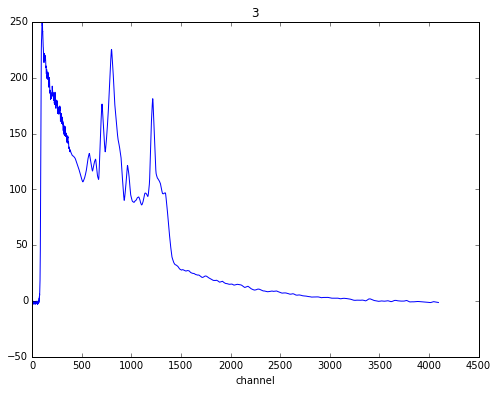

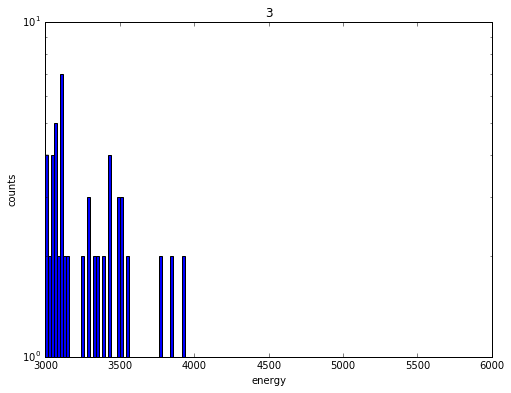

groups=3 counts= 71


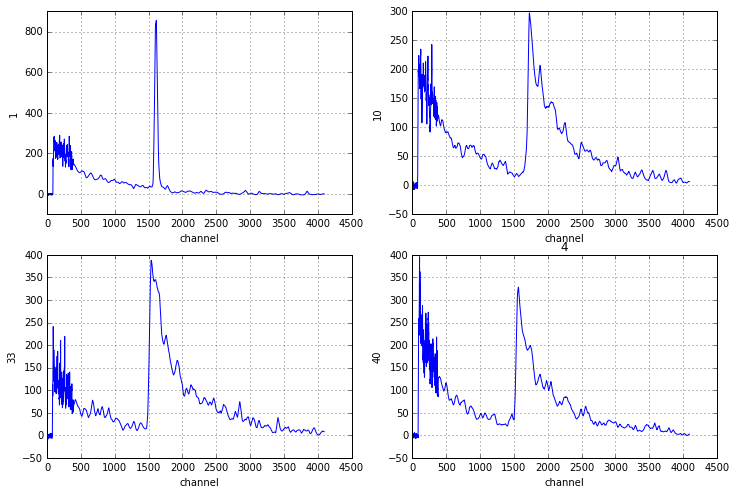

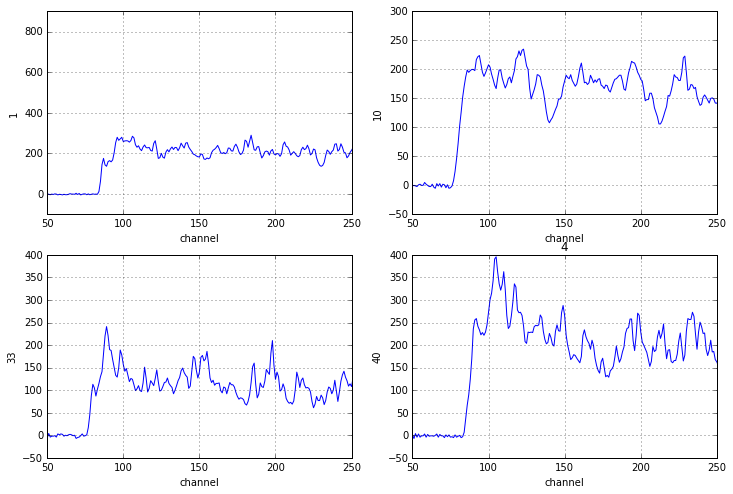

waveform1 [ -2.351562   2.648438  -4.351562  -1.351562   0.648438   0.648438
  -3.351562   0.648438  -3.351562  -1.351562   0.648438  -1.351562
  -0.351562  -1.351562  12.648438  62.648438 144.64844  175.64844
 143.64844  136.64844  159.64844  164.64844  158.64844  167.64844
 203.64844  253.64844  279.64844  264.64844  271.64844  279.64844
 258.64844  261.64844  262.64844  261.64844  255.64844  263.64844
 284.64844  276.64844  242.64844  230.64844  237.64844  221.64844
 213.64844  231.64844  241.64844  228.64844  227.64844  229.64844
 214.64844  211.64844 ]
waveform1 [  1.892578   0.892578  -4.107422   0.892578  -5.107422  -4.107422
  -1.107422   7.892578  23.892578  45.89258   71.89258  101.89258
 125.89258  151.89258  170.89258  186.89258  198.89258  194.89258
 197.89258  199.89258  199.89258  197.89258  216.89258  221.89258
 223.89258  209.89258  194.89258  187.89258  193.89258  200.89258
 207.89258  203.89258  191.89258  182.89258  172.89258  166.89258
 184.89258  198.89258  198.89

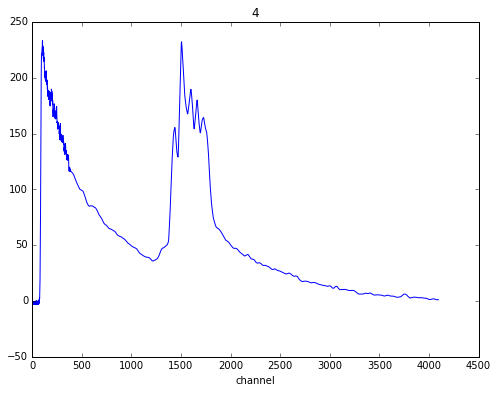

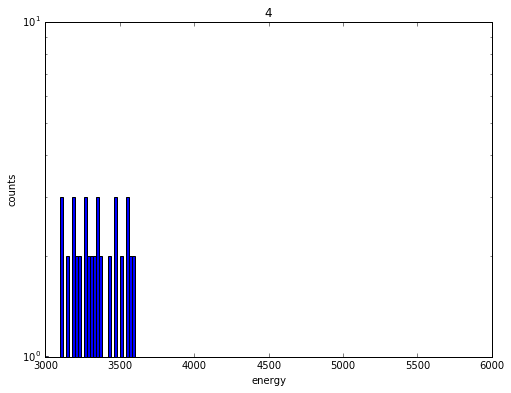

groups=4 counts= 58


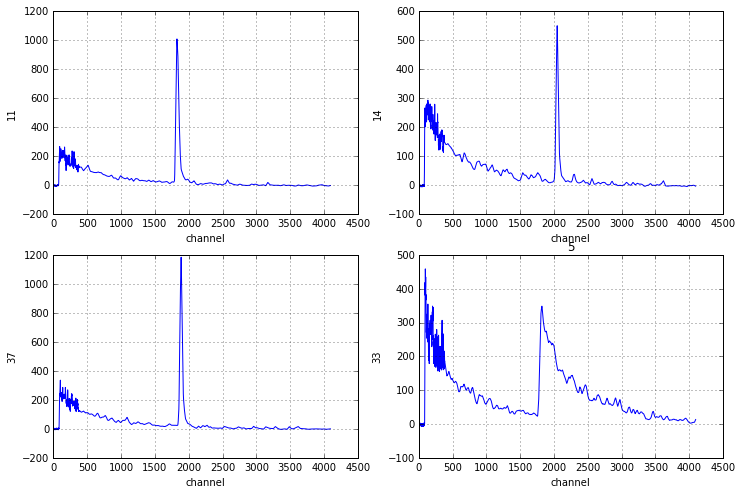

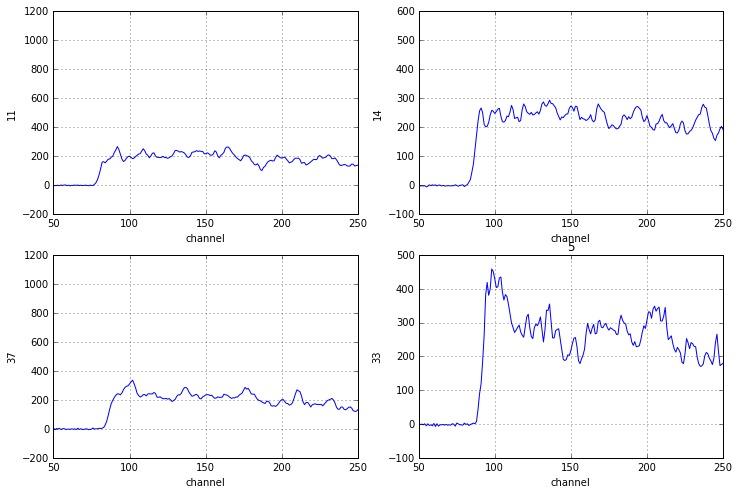

waveform1 [ -0.855469   1.144531  -0.855469  -2.855469   1.144531  -0.855469
  -0.855469   7.144531  19.144531  41.14453   73.14453  114.14453
 160.14453  163.14453  155.14453  168.14453  180.14453  182.14453
 194.14453  201.14453  227.14453  244.14453  267.14453  247.14453
 213.14453  181.14453  164.14453  171.14453  187.14453  198.14453
 201.14453  192.14453  184.14453  188.14453  199.14453  207.14453
 216.14453  218.14453  236.14453  252.14453  238.14453  216.14453
 207.14453  190.14453  202.14453  221.14453  224.14453  203.14453
 193.14453  193.14453 ]
waveform1 [-1.280273e+00 -2.280273e+00 -1.280273e+00 -1.280273e+00  1.719727e+00
 -2.802734e-01 -3.280273e+00 -2.802734e-01  7.197266e-01  1.719727e+00
 -4.280273e+00 -2.802734e-01  2.719727e+00  1.071973e+01  2.071973e+01
  4.671973e+01  7.471973e+01  1.227197e+02  1.727197e+02  2.217197e+02
  2.567197e+02  2.667197e+02  2.507197e+02  2.107197e+02  2.017197e+02
  2.037197e+02  2.167197e+02  2.427197e+02  2.587197e+02  2.557197e+02
 

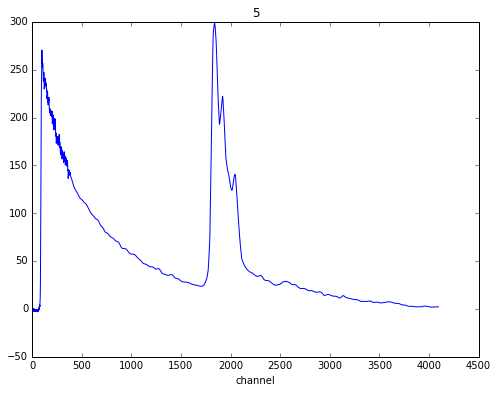

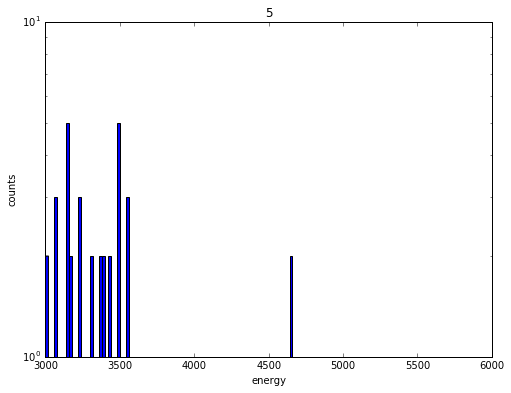

groups=5 counts= 48


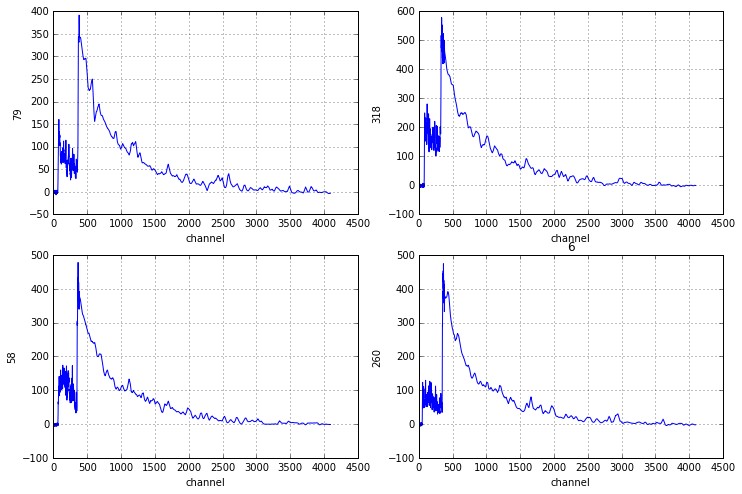

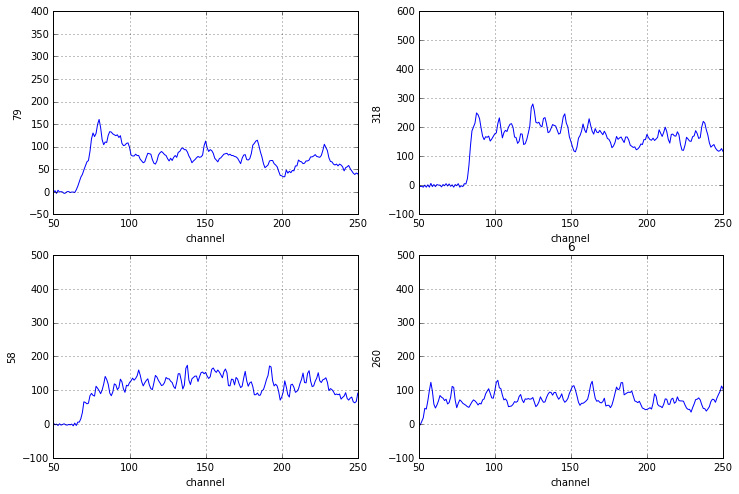

waveform1 [ 48.356445  57.356445  66.356445  69.356445  89.356445 117.356445
 130.35645  122.356445 129.35645  149.35645  160.35645  142.35645
 115.356445 104.356445 110.356445 109.356445 125.356445 133.35645
 132.35645  128.35645  126.356445 124.356445 126.356445 120.356445
 124.356445 107.356445 102.356445 103.356445 107.356445 108.356445
  98.356445  81.356445  79.356445  79.356445  83.356445  80.356445
  80.356445  72.356445  68.356445  64.356445  66.356445  76.356445
  85.356445  84.356445  83.356445  71.356445  63.356445  61.356445
  68.356445  81.356445]
waveform1 [  4.667969  -3.332031   1.667969  -6.332031   2.667969  -1.332031
   5.667969  -6.332031  -1.332031  -4.332031   5.667969   4.667969
  22.667969  67.66797  134.66797  187.66797  200.66797  214.66797
 249.66797  243.66797  229.66797  197.66797  169.66797  157.66797
 167.66797  165.66797  169.66797  152.66797  159.66797  168.66797
 177.66797  180.66797  212.66797  232.66797  197.66797  163.66797
 181.66797  189.66797  1

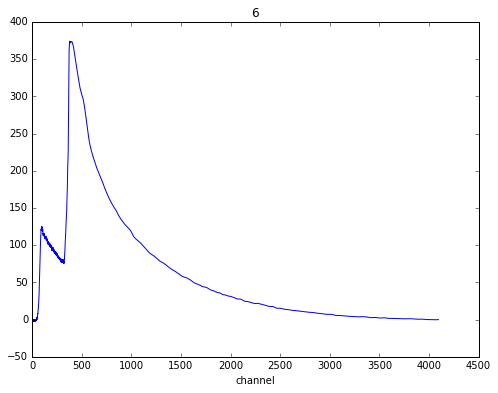

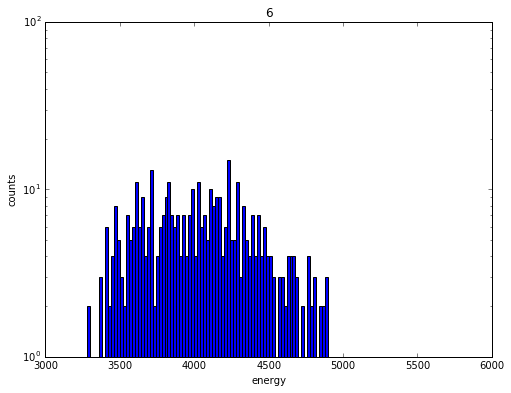

groups=6 counts= 420


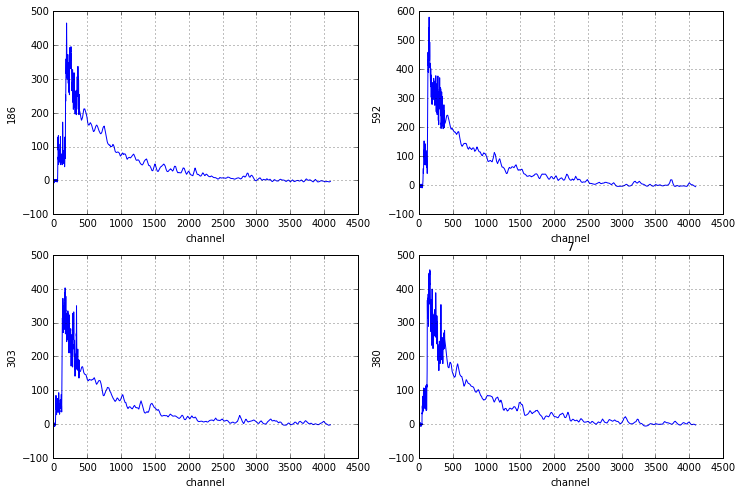

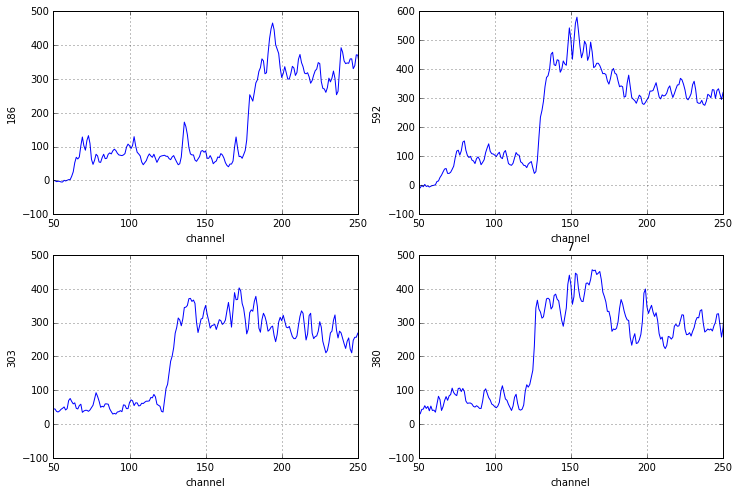

waveform1 [102.5957    89.5957   118.5957   132.5957   109.5957    62.595703
  47.595703  59.595703  77.5957    72.5957    54.595703  53.595703
  67.5957    77.5957    64.5957    65.5957    77.5957    81.5957
  78.5957    87.5957    92.5957    88.5957    80.5957    75.5957
  74.5957    73.5957    75.5957    79.5957    98.5957   107.5957
 102.5957    94.5957   103.5957   129.5957   102.5957    83.5957
  78.5957    72.5957    54.595703  46.595703  52.595703  58.595703
  70.5957    78.5957    72.5957    68.5957    77.5957    65.5957
  53.595703  62.595703]
waveform1 [ 41.09082  45.09082  55.09082  66.09082  95.09082 118.09082 121.09082
 104.09082 119.09082 149.09082 153.09082 121.09082 103.09082  96.09082
 100.09082  87.09082  84.09082  75.09082  92.09082  98.09082  89.09082
  71.09082  79.09082  88.09082 113.09082 129.09082 143.09082 117.09082
 109.09082 108.09082 104.09082  99.09082 108.09082 114.09082  96.09082
  92.09082 113.09082 120.09082  99.09082  75.09082  71.09082  69.09082
  76

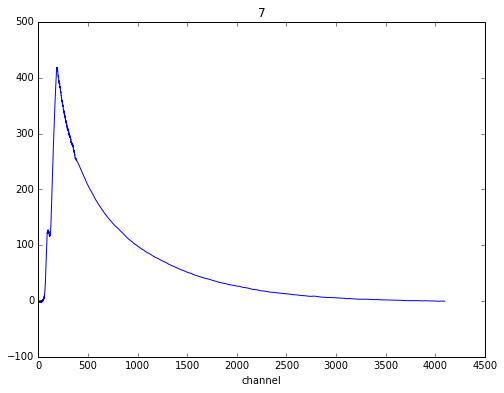

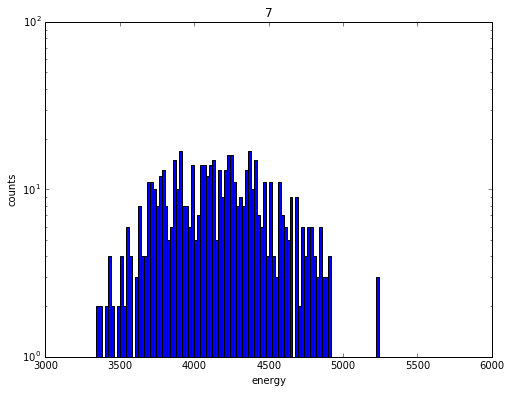

groups=7 counts= 617


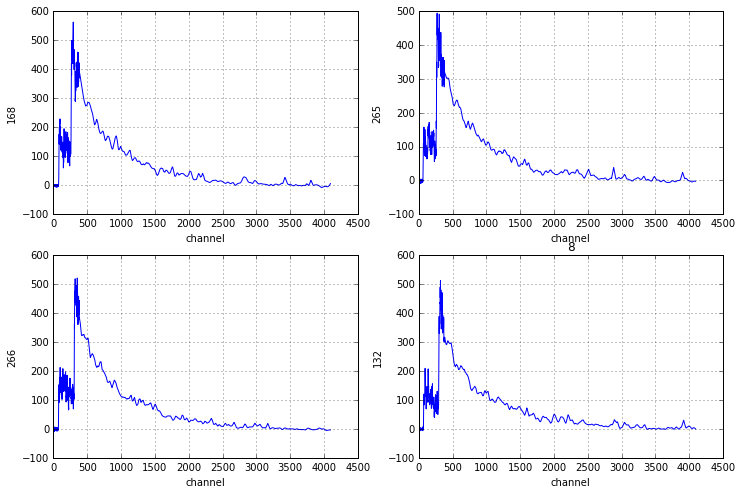

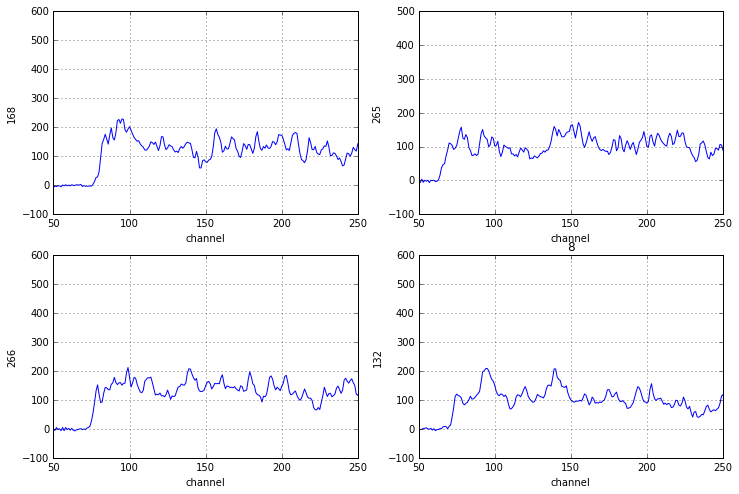

waveform1 [ -0.915039  -2.915039  -2.915039  -2.915039  -1.915039  -2.915039
   4.084961  13.084961  27.08496   29.08496   47.08496   94.08496
 144.08496  158.08496  176.08496  160.08496  142.08496  174.08496
 198.08496  165.08496  156.08496  180.08496  223.08496  227.08496
 214.08496  229.08496  227.08496  192.08496  183.08496  194.08496
 202.08496  189.08496  177.08496  165.08496  158.08496  152.08496
 154.08496  143.08496  136.08496  132.08496  122.08496  121.08496
 127.08496  135.08496  150.08496  147.08496  141.08496  149.08496
 134.08496  120.08496 ]
waveform1 [110.78418 108.78418 103.78418  91.78418  95.78418 103.78418 124.78418
 145.78418 157.78418 125.78418 121.78418 135.78418 126.78418  96.78418
  88.78418  73.78418  74.78418  78.78418  73.78418  77.78418 106.78418
 137.78418 150.78418 131.78418 125.78418 121.78418  99.78418 105.78418
 128.78418 124.78418 101.78418 103.78418 115.78418  85.78418  70.78418
  83.78418 104.78418 100.78418  97.78418  94.78418  96.78418  78.78418
 

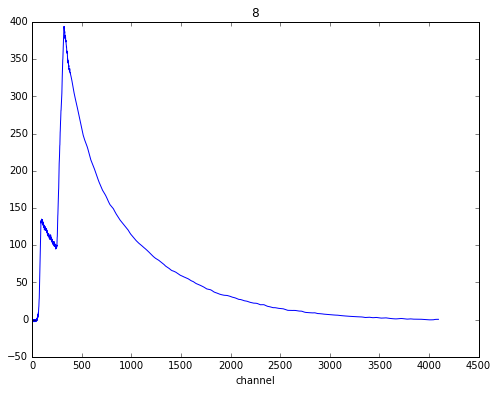

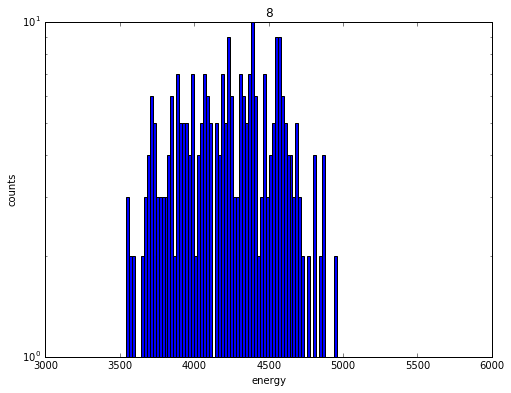

groups=8 counts= 300


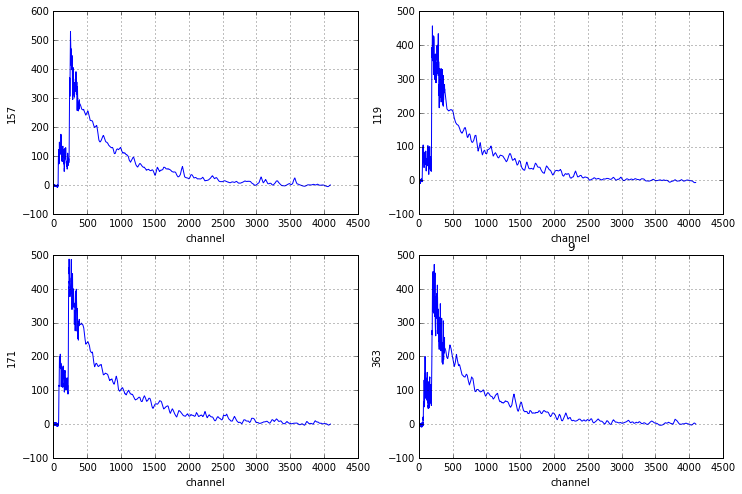

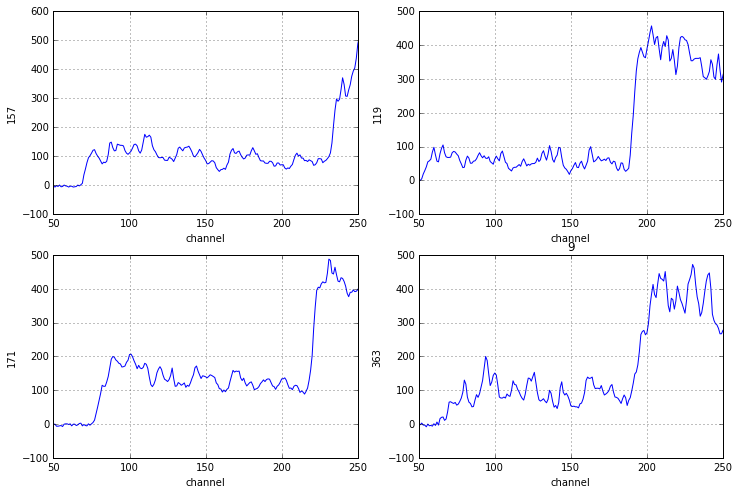

waveform1 [ 35.972656  55.972656  77.97266   94.97266  101.97266  110.97266
 120.97266  122.97266  109.97266  100.97266   93.97266   83.97266
  73.97266   79.97266   77.97266   82.97266  105.97266  145.97266
 148.97266  129.97266  118.97266  119.97266  141.97266  139.97266
 137.97266  137.97266  135.97266  119.97266  110.97266  106.97266
 111.97266  117.97266  128.97266  140.97266  141.97266  135.97266
 118.97266  110.97266  121.97266  149.97266  175.97266  165.97266
 167.97266  172.97266  165.97266  136.97266  122.97266  115.97266
 104.97266   95.97266 ]
waveform1 [68.100586 69.100586 82.100586 86.100586 84.100586 78.100586 73.100586
 59.100586 49.100586 38.100586 39.100586 60.100586 72.100586 66.100586
 51.100586 51.100586 57.100586 58.100586 64.100586 74.100586 82.100586
 73.100586 67.100586 73.100586 66.100586 65.100586 70.100586 56.100586
 52.100586 48.100586 63.100586 72.100586 64.100586 58.100586 80.100586
 87.100586 71.100586 54.100586 50.100586 36.100586 32.100586 28.100586
 3

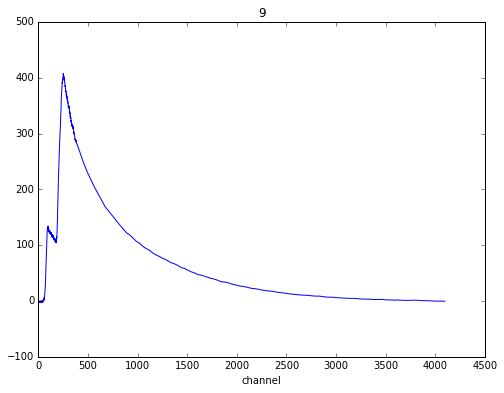

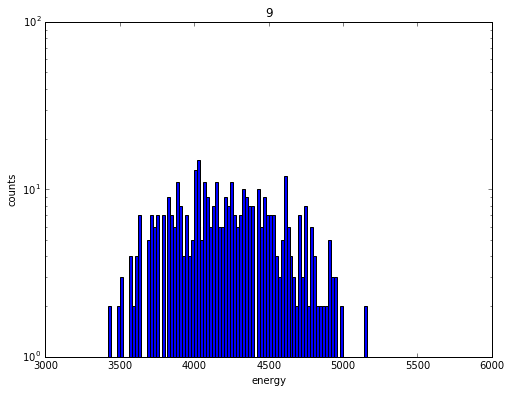

groups=9 counts= 439


In [4]:
sel2 = np.load("selector_psd.npy")

for i in np.unique(sel2):
    file = Waveform2(path="../Run9psd15_3000.root", selector=i)
    r1 = np.random.randint(len(file[:][1])) 
    r2 = np.random.randint(len(file[:][1]))
    r3 = np.random.randint(len(file[:][1]))
    r4 = np.random.randint(len(file[:][1]))
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(file[r1][0])
    plt.grid(True)
    plt.ylabel("{}".format(r1))
    plt.xlabel("channel")
    plt.subplot(222)
    plt.plot(file[r2][0])
    plt.grid(True)
    plt.ylabel("{}".format(r2))
    plt.xlabel("channel")
    plt.subplot(223)
    plt.plot(file[r3][0])
    plt.grid(True)
    plt.ylabel("{}".format(r3))
    plt.xlabel("channel")
    plt.subplot(224)
    plt.plot(file[r4][0])
    plt.grid(True)
    plt.ylabel("{}".format(r4))
    plt.xlabel("channel")
#     plt.savefig("fig/wave_psd{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(file[r1][0])
    plt.xlim(50,250)
    plt.grid(True)
    plt.ylabel("{}".format(r1))
    plt.xlabel("channel")
    plt.subplot(222)
    plt.plot(file[r2][0])
    plt.xlim(50,250)
    plt.grid(True)
    plt.ylabel("{}".format(r2))
    plt.xlabel("channel")
    plt.subplot(223)
    plt.plot(file[r3][0])
    plt.xlim(50,250)
    plt.grid(True)
    plt.ylabel("{}".format(r3))
    plt.xlabel("channel")
    plt.subplot(224)
    plt.plot(file[r4][0])
    plt.xlim(50,250)
    plt.grid(True)
    plt.ylabel("{}".format(r4))
    plt.xlabel("channel")
#     plt.savefig("fig/zoom_psd{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    
    np.set_printoptions(precision=6)
    print("waveform1", file[r1][0][70:120])
    print("waveform1", file[r2][0][70:120])
    print("waveform1", file[r3][0][70:120])
    print("waveform1", file[r4][0][70:120])
    
    
    plt.figure(figsize=(8,6))
    plt.plot(np.mean(file[:][0],axis=0))
    plt.xlabel("channel")
#     plt.savefig("fig/avwave_psd{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.hist(file[:][1], bins=np.arange(3000,6000,20))
    plt.yscale("log")
    plt.xlabel("energy")
    plt.ylabel("counts")
#     plt.savefig("fig/hist_psd{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    print("groups={}".format(i), "counts=",len(file[:][1]))

In [6]:
e2 = Waveform2(path="../Run9psd15_3000.root", selector=2)
e6 = Waveform2(path="../Run9psd15_3000.root", selector=6)
e7 = Waveform2(path="../Run9psd15_3000.root", selector=7)
e8 = Waveform2(path="../Run9psd15_3000.root", selector=8)
e9 = Waveform2(path="../Run9psd15_3000.root", selector=9)

In [7]:
et = np.concatenate((e6[:][1],e7[:][1],e8[:][1],e9[:][1]),axis=0)
et2 = np.concatenate((e2[:][1],e6[:][1],e7[:][1],e8[:][1],e9[:][1]),axis=0)
# print(e6[:][1].shape)
# print(e7)
print(et.shape)
print(et2.shape)

(1776,)
(2416,)


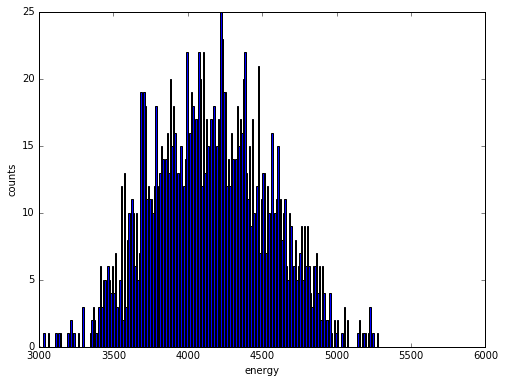

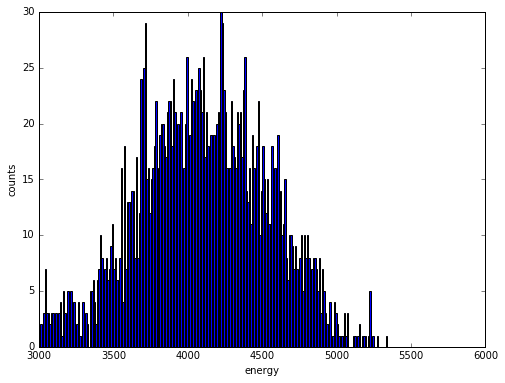

In [8]:
plt.figure(figsize=(8,6))
plt.hist(et, bins=np.arange(3000,6000,10))
# plt.yscale("log")
plt.xlabel("energy")
plt.ylabel("counts")
plt.savefig("dp.png")
plt.show()
plt.figure(figsize=(8,6))
plt.hist(et2, bins=np.arange(3000,6000,10))
# plt.yscale("log")
plt.xlabel("energy")
plt.ylabel("counts")
plt.savefig("dp2.png")
plt.show()